In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

In [2]:
import os
BASE_DIR = globals()['_dh'][0] # esta es la constante en donde esta mi script.
ruta_train = os.path.join(BASE_DIR, "data", "train.csv") # aca estoy diciendo que parado en el diriectorio BASE_DIR, entre a la carpeta img y busque el archivo tal.
ruta_test= os.path.join(BASE_DIR, "data", "test.csv")
#print(ruta)

dataset_df = pd.read_csv(ruta_train)
test_data = pd.read_csv(ruta_test)
print("Full train dataset shape is {}".format(dataset_df.shape))

Full train dataset shape is (8693, 14)


In [3]:
dataset_df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [4]:
dataset_df.columns

Index(['PassengerId', 'HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'Age',
       'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck',
       'Name', 'Transported'],
      dtype='object')

In [5]:
dataset_df.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


In [6]:
dataset_df.shape

(8693, 14)

In [7]:
dataset_df.info

<bound method DataFrame.info of      PassengerId HomePlanet CryoSleep     Cabin    Destination   Age    VIP  \
0        0001_01     Europa     False     B/0/P    TRAPPIST-1e  39.0  False   
1        0002_01      Earth     False     F/0/S    TRAPPIST-1e  24.0  False   
2        0003_01     Europa     False     A/0/S    TRAPPIST-1e  58.0   True   
3        0003_02     Europa     False     A/0/S    TRAPPIST-1e  33.0  False   
4        0004_01      Earth     False     F/1/S    TRAPPIST-1e  16.0  False   
...          ...        ...       ...       ...            ...   ...    ...   
8688     9276_01     Europa     False    A/98/P    55 Cancri e  41.0   True   
8689     9278_01      Earth      True  G/1499/S  PSO J318.5-22  18.0  False   
8690     9279_01      Earth     False  G/1500/S    TRAPPIST-1e  26.0  False   
8691     9280_01     Europa     False   E/608/S    55 Cancri e  32.0  False   
8692     9280_02     Europa     False   E/608/S    TRAPPIST-1e  44.0  False   

      RoomService  

>I'm going to explore missing values in all columns

In [8]:
# this script shows the summ of missing values of all columns
dataset_df.isna().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

In [9]:
print(type(dataset_df))

<class 'pandas.core.frame.DataFrame'>


In [10]:
# clear dataset removing columns: [Name]
X = dataset_df.copy()
X_test = test_data.copy()
#train_data
X.columns

# separate target from predictors
y = X.Transported
X.drop(columns = ['Transported', 'Name'])
X_test.drop(columns = ['Name'])

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
4272,9266_02,Earth,True,G/1496/S,TRAPPIST-1e,34.0,False,0.0,0.0,0.0,0.0,0.0
4273,9269_01,Earth,False,NaN,TRAPPIST-1e,42.0,False,0.0,847.0,17.0,10.0,144.0
4274,9271_01,Mars,True,D/296/P,55 Cancri e,NaN,False,0.0,0.0,0.0,0.0,0.0
4275,9273_01,Europa,False,D/297/P,NaN,NaN,False,0.0,2680.0,0.0,0.0,523.0


>Prepare data for a pipeline

In [23]:
from sklearn.model_selection import train_test_split

# Divide data into training and validation subsets
X_train_full, X_valid_full, y_train, y_valid = train_test_split(X, y, train_size=0.8, test_size=0.2,
                                                                random_state=0)

# "Cardinality" means the number of unique values in a column
# Select categorical columns with relatively low cardinality (convenient but arbitrary)
categorical_cols = [cname for cname in X_train_full.columns if X_train_full[cname].nunique() < 10 and 
                        X_train_full[cname].dtype == "object"]

# Select numerical columns
numerical_cols = [cname for cname in X_train_full.columns if X_train_full[cname].dtype in ['int64', 'float64']]

# Keep selected columns only
my_cols = categorical_cols + numerical_cols
X_train = X_train_full[my_cols].copy()
X_valid = X_valid_full[my_cols].copy()
X_test = X_test[my_cols].copy()

In [12]:
X_train.head()

,HomePlanet,CryoSleep,Destination,VIP,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
4278,Europa,False,55 Cancri e,False,54.0,0.0,559.0,0.0,15238.0,2799.0
5971,Earth,False,TRAPPIST-1e,False,20.0,0.0,20.0,1.0,696.0,0.0
464,Mars,False,TRAPPIST-1e,False,43.0,1821.0,0.0,47.0,29.0,0.0
4475,Earth,False,TRAPPIST-1e,False,24.0,185.0,0.0,476.0,1810.0,53.0
8469,Europa,True,55 Cancri e,False,25.0,0.0,0.0,0.0,0.0,0.0


>Pipeline

In [13]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder

# Preprocessing for numerical data
numerical_transformer = SimpleImputer(strategy='median')

# Preprocessing for categorical data
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Bundle preprocessing for numerical and categorical data
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

In [14]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=1)

In [15]:
from sklearn.metrics import mean_absolute_error

# Bundle preprocessing and modeling code in a pipeline
my_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                              ('model', model)
                             ])

# Preprocessing of training data, fit model 
my_pipeline.fit(X_train, y_train)

# Preprocessing of validation data, get predictions
preds = my_pipeline.predict(X_valid)

# Evaluate the model
#score = mean_absolute_error(y_valid, preds)
#print('MAE:', score)

In [16]:
preds

array([False,  True, False, ...,  True, False, False])

>Evaluate the model

In [17]:
from sklearn.metrics import accuracy_score
score = accuracy_score(y_valid, preds)
print('The score is: ', score)

The score is:  0.7763082231167338


>Cross Validation

In [18]:
from sklearn.model_selection import cross_val_score
score_cv = cross_val_score(my_pipeline, X, y,
                              cv= 5,
                              scoring='f1')
print('MAE: ', round(score_cv.mean(),4))

MAE:  0.7725


In [19]:
def get_score(n_estimators):
    """Return the average MAE over 5 CV folds of random forest model.
    
    Keyword argument:
    n_estimators -- the number of trees in the forest
    """
    model = RandomForestClassifier(n_estimators=n_estimators, max_depth=5, random_state=1)
    my_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                              ('model', model)
                             ])
    
    scores_cv = cross_val_score(my_pipeline, X, y,
                              cv= 5,
                              scoring='f1')
    MAE = round(scores_cv.mean(),4)
    return MAE

In [21]:
results = {}
i = 50
while i <= 400:
    results[i] = get_score(i)
    i += 50

print(results)

{50: 0.7727, 100: 0.7725, 150: 0.7723, 200: 0.773, 250: 0.7727, 300: 0.7715, 350: 0.7722, 400: 0.7718}


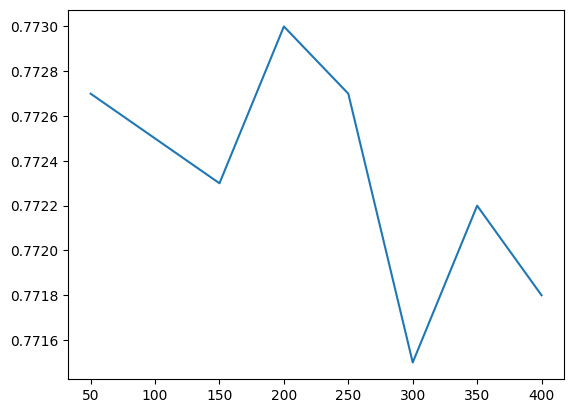

In [24]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(list(results.keys()), list(results.values()))
plt.show()

>I'll choose n_estimator = 300

In [25]:
test_data.isna().sum()

PassengerId       0
HomePlanet       87
CryoSleep        93
Cabin           100
Destination      92
Age              91
VIP              93
RoomService      82
FoodCourt       106
ShoppingMall     98
Spa             101
VRDeck           80
Name             94
dtype: int64

In [31]:
model = RandomForestClassifier(n_estimators=300, max_depth=5, random_state=1)
predictions = my_pipeline.predict(X_test)
print(type(predictions))
predictions

output = pd.DataFrame({'PassengerId': test_data.PassengerId, 'Transported': predictions})
output.to_csv('submission.csv', index=False)
print("Your submission was successfully saved!")


<class 'numpy.ndarray'>
Your submission was successfully saved!


In [33]:
check = pd.read_csv('submission.csv')
check

,PassengerId,Transported
0,0013_01,True
1,0018_01,False
2,0019_01,True
3,0021_01,True
4,0023_01,False
...,...,...
4272,9266_02,True
4273,9269_01,False
4274,9271_01,True
4275,9273_01,True
